In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import pickle
from scipy import stats
import warnings
warnings.filterwarnings('ignore')



In [5]:
arr=pd.read_csv("Airline_Reviews.csv")
arr.head()

ParserError: ignored

In [ ]:
arr1=ar.drop(['Review_Title','Review','Review Date','Inflight Entertainment','Wifi & Connectivity','Aircraft','Value For Money'],axis=1)

In [ ]:
arr1.head()

,Airline Name,Overall_Rating,Verified,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Recommended
0,AB Aviation,9,True,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,yes
1,AB Aviation,1,True,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,no
2,AB Aviation,1,True,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,no
3,Adria Airways,1,False,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,no
4,Adria Airways,1,True,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,no


In [ ]:
arr1['Overall_Rating']=ar1['Overall_Rating'].replace('n',10)

In [ ]:
arr1.isnull().sum()

Airline Name              0
Overall_Rating            0
Verified                  0
Type Of Traveller      3738
Seat Type              1096
Route                  3828
Date Flown             3754
Seat Comfort           4155
Cabin Staff Service    4260
Food & Beverages       8671
Ground Service         4793
Recommended               0
dtype: int64

In [ ]:
arr1['Type Of Traveller']=ar1['Type Of Traveller'].fillna(arr1['Type Of Traveller'].mode()[0])
arr1['Type Of Traveller'].isnull().sum()

0

In [ ]:
arr1['Seat Type']=arr1['Seat Type'].fillna(arr1['Seat Type'].mode()[0])
arr1['Seat Type'].isnull().sum()

0

In [ ]:
arr1['Route']=ar1['Route'].fillna(arr1['Route'].mode()[0])
arr1['Route'].isnull().sum()

0

In [ ]:
arr1['Date Flown']=arr1['Date Flown'].fillna(arr1['Date Flown'].mode()[0])
arr1['Date Flown'].isnull().sum()

0

0

In [ ]:
arr1['Seat Comfort']=arr1['Seat Comfort'].fillna(arr1['Seat Comfort'].mode()[0])
arr1['Seat Comfort'].isnull().sum()

0

In [ ]:
arr1['Cabin Staff Service']=arr1['Cabin Staff Service'].fillna(arr1['Cabin Staff Service'].mode()[0])
arr1['Cabin Staff Service'].isnull().sum()

0

In [ ]:
arr1['Food & Beverages']=arr1['Food & Beverages'].fillna(arr1['Food & Beverages'].mode()[0])
arr1['Food & Beverages'].isnull().sum()

0

In [ ]:
arr1['Ground Service']=arr1['Ground Service'].fillna(arr1['Ground Service'].mode()[0])
arr1['Ground Service'].isnull().sum()

0

In [ ]:
arr1.head()

,Airline Name,Overall_Rating,Verified,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Recommended
0,AB Aviation,9,True,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,yes
1,AB Aviation,1,True,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,no
2,AB Aviation,1,True,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,no
3,Adria Airways,1,False,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,1.0,1.0,no
4,Adria Airways,1,True,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,no


In [ ]:
arr1.isnull().sum()

Airline Name           0
Overall_Rating         0
Verified               0
Type Of Traveller      0
Seat Type              0
Route                  0
Date Flown             0
Seat Comfort           0
Cabin Staff Service    0
Food & Beverages       0
Ground Service         0
Recommended            0
dtype: int64

In [ ]:
arr1['Date Flown']=ar1['Date Flown'].astype(str)
arr1[['Month Flown','Year Flown']]=arr1['Date Flown'].str.extract(r'(\w+)\s(\d+)')

In [ ]:
arr1['Origin']=arr1.Route.str.split('to',expand=True)[0]
arr1['Destination']=arr1.Route.str.split('to',expand=True)[1]

In [ ]:
arr1.head()

,Airline Name,Overall_Rating,Verified,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Recommended,Month Flown,Year Flown,Origin,Destination
0,AB Aviation,9,True,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,yes,November,2019,Moroni,Moheli
1,AB Aviation,1,True,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,no,June,2019,Moroni,Anjouan
2,AB Aviation,1,True,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,no,June,2019,Anjouan,Dzaoudzi
3,Adria Airways,1,False,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,1.0,1.0,no,September,2019,Frankfurt,Pristina
4,Adria Airways,1,True,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,no,September,2019,Sofia,Amsterdam via Ljubljana


In [ ]:
del arr1['Route']
del arr1['Date Flown']

In [ ]:
arr1.head()

,Airline Name,Overall_Rating,Verified,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Recommended,Month Flown,Year Flown,Origin,Destination
0,AB Aviation,9,True,Solo Leisure,Economy Class,4.0,5.0,4.0,4.0,yes,November,2019,Moroni,Moheli
1,AB Aviation,1,True,Solo Leisure,Economy Class,2.0,2.0,1.0,1.0,no,June,2019,Moroni,Anjouan
2,AB Aviation,1,True,Solo Leisure,Economy Class,2.0,1.0,1.0,1.0,no,June,2019,Anjouan,Dzaoudzi
3,Adria Airways,1,False,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,no,September,2019,Frankfurt,Pristina
4,Adria Airways,1,True,Couple Leisure,Economy Class,1.0,1.0,1.0,1.0,no,September,2019,Sofia,Amsterdam via Ljubljana


In [ ]:
arr1.columns

Index(['Airline Name', 'Overall_Rating', 'Verified', 'Type Of Traveller',
       'Seat Type', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Ground Service', 'Recommended', 'Month Flown', 'Year Flown', 'Origin',
       'Destination'],
      dtype='object')

In [ ]:
new_index=['Airline Name', 'Overall_Rating', 'Verified', 'Type Of Traveller',
       'Seat Type','Origin','Destination','Month Flown','Year Flown', 'Seat Comfort', 'Cabin Staff Service',
       'Food & Beverages', 'Ground Service', 'Recommended']

In [ ]:
arr1=arr1.reindex(columns=new_index)

In [ ]:
print(arr1['Airline Name'].value_counts())

Caribbean Airlines           100
GoAir                        100
Germanwings                  100
Philippine Airlines          100
Bangkok Airways              100
                            ... 
JC International Airlines      1
MEGA Maldives Airlines         1
MAYAir                         1
Tibet Airlines                 1
Dimonim Air                    1
Name: Airline Name, Length: 497, dtype: int64


In [ ]:
arr1.head()

,Airline Name,Overall_Rating,Verified,Type Of Traveller,Seat Type,Origin,Destination,Month Flown,Year Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Recommended
0,AB Aviation,9,True,Solo Leisure,Economy Class,Moroni,Moheli,November,2019,4.0,5.0,4.0,4.0,yes
1,AB Aviation,1,True,Solo Leisure,Economy Class,Moroni,Anjouan,June,2019,2.0,2.0,1.0,1.0,no
2,AB Aviation,1,True,Solo Leisure,Economy Class,Anjouan,Dzaoudzi,June,2019,2.0,1.0,1.0,1.0,no
3,Adria Airways,1,False,Solo Leisure,Economy Class,Frankfurt,Pristina,September,2019,1.0,1.0,1.0,1.0,no
4,Adria Airways,1,True,Couple Leisure,Economy Class,Sofia,Amsterdam via Ljubljana,September,2019,1.0,1.0,1.0,1.0,no


In [ ]:
airline_unique=ar1['Airline Name'].unique()
print(airline_unique)
import json
file_name="airline_unique.json"
unique_airlines_list = airline_unique.tolist()
with open(file_name, 'w') as json_file:
    json.dump(unique_airlines_list, json_file)

['AB Aviation' 'Adria Airways' 'Aegean Airlines' 'Aer Lingus' 'Aero VIP'
 'Aerocaribbean' 'Aeroflot Russian Airlines' 'AeroItalia'
 'Aerolineas Argentinas' 'Aeromar' 'Aeromexico' 'Aerosur'
 'Africa World Airlines' 'Afriqiyah Airways' 'Aigle Azur' 'Air Algerie'
 'Air Antilles' 'Air Arabia' 'Air Astana' 'Air Austral' 'Air Bagan'
 'Air Berlin' 'Air Botswana' 'Air Burkina' 'Air Busan' 'Air Cairo'
 'Air Canada' 'Air Canada rouge' 'Air Caraibes' 'Air China' 'Air Corsica'
 'Air Costa' "Air Cote d'Ivoire" 'Air Djibouti' 'Air Dolomiti'
 'Air Europa' 'Air France' 'Air Greenland' 'Air Iceland Connect'
 'Air India' 'Air India Express' 'Air Italy' 'Air Juan' 'Air KBZ'
 'Air Koryo' 'Air Labrador' 'Air Macau' 'Air Madagascar' 'Air Malawi'
 'Air Malta' 'Air Mauritius' 'Air Mediterranee' 'Air Memphis'
 'Air Moldova' 'Air Namibia' 'Air New Zealand' 'Air Niugini'
 "Air North Yukon's Airline" 'Air Nostrum' 'Air Panama' 'Air Pegasus'
 'Air Rarotonga' 'Air Serbia' 'Air Seychelles' 'Air Tahiti Nui'
 'Air Tan

# New Section

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
le5=LabelEncoder()
le6=LabelEncoder()
le7=LabelEncoder()
le8=LabelEncoder()
le9=LabelEncoder()

In [ ]:
arr1['Airline Name']=le1.fit_transform(arr1['Airline Name'])
arr1['Verified']=le2.fit_transform(arr1['Verified'])
arr1['Type Of Traveller']=le3.fit_transform(arr1['Type Of Traveller'])
arr1['Seat Type']=le4.fit_transform(arr1['Seat Type'])
arr1['Origin']=le5.fit_transform(arr1['Origin'])
arr1['Destination']=le6.fit_transform(arr1['Destination'])
arr1['Month Flown']=le7.fit_transform(arr1['Month Flown'])
arr1['Year Flown']=le8.fit_transform(arr1['Year Flown'])
arr1['Recommended']=le9.fit_transform(arr1['Recommended'])


In [ ]:
arr1.head()

,Airline Name,Overall_Rating,Verified,Type Of Traveller,Seat Type,Origin,Destination,Month Flown,Year Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Recommended
0,0,9,1,3,1,1284,3129,9,6,4.0,5.0,4.0,4.0,1
1,0,1,1,3,1,1284,205,6,6,2.0,2.0,1.0,1.0,0
2,0,1,1,3,1,80,1421,6,6,2.0,1.0,1.0,1.0,0
3,4,1,0,3,1,633,3836,11,6,1.0,1.0,1.0,1.0,0
4,4,1,1,1,1,1832,179,11,6,1.0,1.0,1.0,1.0,0


In [ ]:
ar1.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service
count,19016.000000,18911.000000,14500.000000,18378.000000
mean,2.618321,2.871609,2.553586,2.353738
std,1.464844,1.604631,1.526314,1.595747
min,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,2.000000,1.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


[Text(0.5, 0, 'index')]

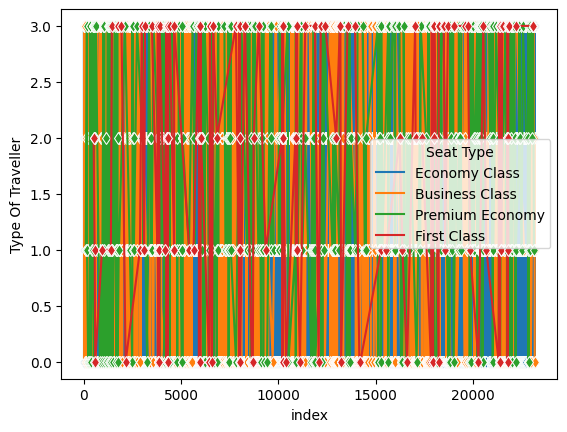

In [ ]:
fig=sns.lineplot(x=arr1.index,y=arr1['Type Of Traveller'],markevery=1,marker='d',hue=ar1['Seat Type'])
sns.set(rc={'figure.figsize':[10,10]})
fig.set(xlabel='index')

<Axes: >

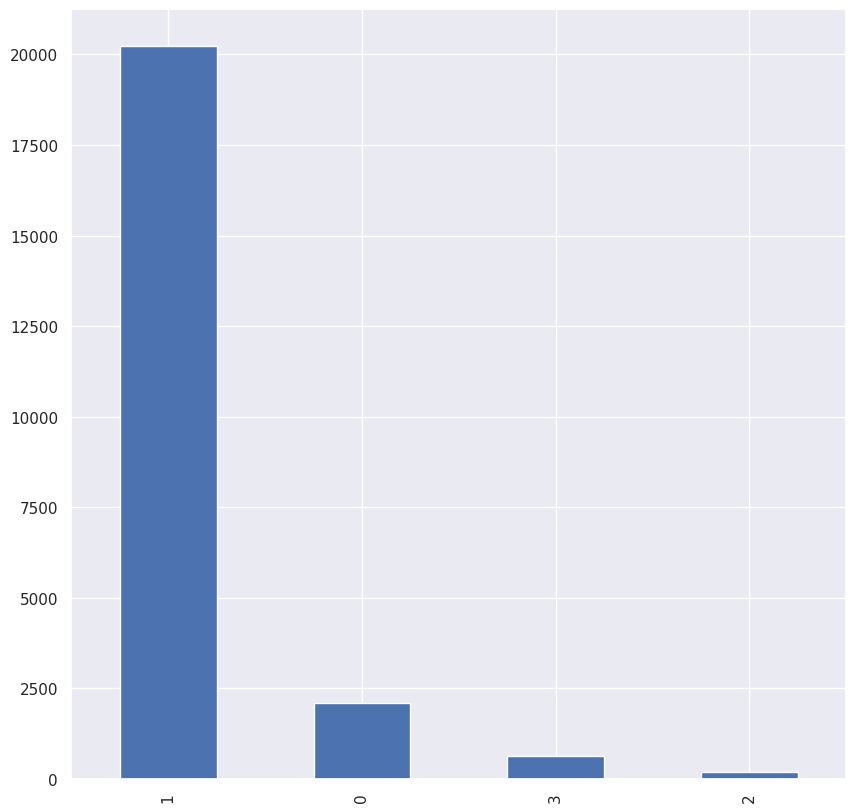

In [ ]:
arr1['Seat Type'].value_counts().plot.bar()

([<matplotlib.patches.Wedge at 0x7e3771e019c0>,
 [Text(-0.4255806105829949, -1.0143377858957072, 'Economy'),
  Text(0.5370556832029272, 0.9599849963095451, 'Buisness'),
  Text(0.15134436463791998, 1.0895388397355756, 'Premium'),
  Text(0.027737504813067807, 1.099650231131129, 'First')],
 [Text(-0.23213487849981534, -0.5532751559431129, '87.355'),
  Text(0.292939463565233, 0.5236281798052064, '9.054'),
  Text(0.08255147162068362, 0.5942939125830412, '2.788'),
  Text(0.015129548079855165, 0.5998092169806156, '0.803')])

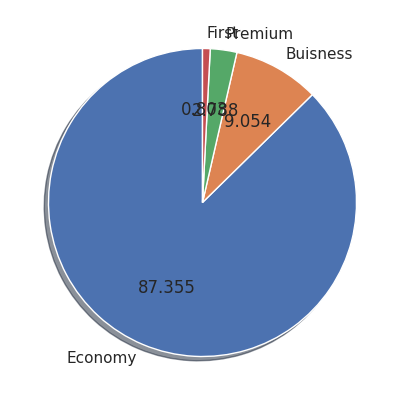

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(arr1['Seat Type'].value_counts(),startangle=90,autopct='%.3f',shadow=True,labels=['Economy','Buisness','Premium','First'])

<Axes: xlabel='Type Of Traveller', ylabel='Seat Type'>

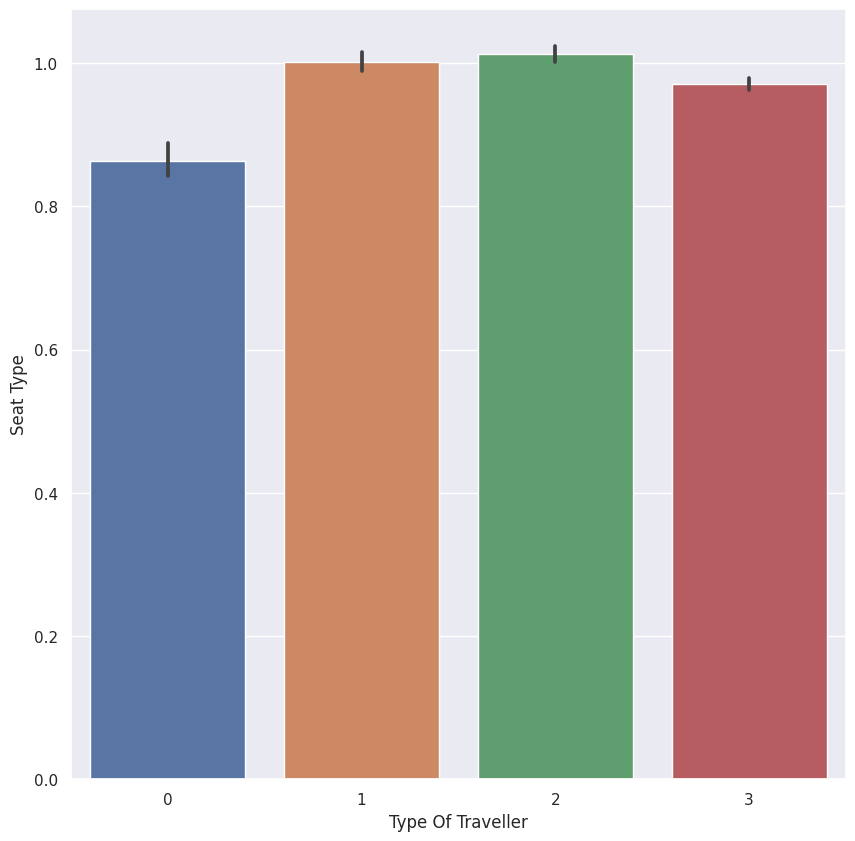

In [ ]:
sns.barplot(data=arr1,x='Type Of Traveller',y='Seat Type')

<Axes: >

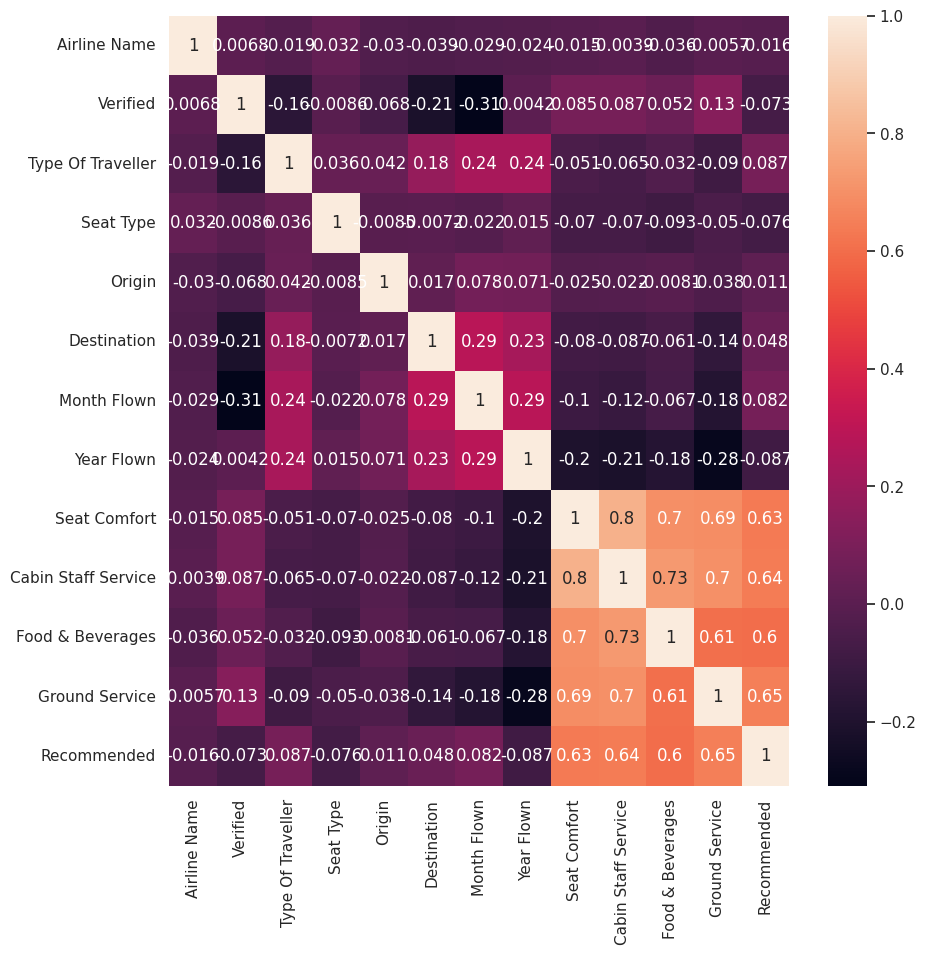

In [ ]:
sns.heatmap(arr1.corr(),annot=True)

In [ ]:
x=arr1.loc[:,'Airline Name':'Ground Service']
y=arr1['Recommended']

In [ ]:
smote=SMOTE(sampling_strategy='auto',random_state=50)
x,y=smote.fit_resample(x,y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
ss=StandardScaler()

In [ ]:
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)
import pickle
pickle.dump(ss,open('ss1.pkl','wb'))

In [ ]:
model1=DecisionTreeClassifier(criterion='entropy',random_state=0)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
pred1=model1.predict(x_test)
pred1

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
print(classification_report(y_test,pred1))
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(roc_auc_score(y_test,pred1))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85      3053
           1       0.81      0.97      0.88      3093

    accuracy                           0.87      6146
   macro avg       0.89      0.87      0.87      6146
weighted avg       0.89      0.87      0.87      6146

0.8696713309469574
[[2334  719]
 [  82 3011]]
0.8689912314282994


In [ ]:
model2=RandomForestClassifier(criterion='entropy',n_estimators=10,random_state=0)
model2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
pred2=model2.predict(x_test)
pred2

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test,pred2))
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(roc_auc_score(y_test,pred2))

              precision    recall  f1-score   support

           0       0.97      0.64      0.77      3053
           1       0.73      0.98      0.84      3093

    accuracy                           0.81      6146
   macro avg       0.85      0.81      0.81      6146
weighted avg       0.85      0.81      0.81      6146

0.8109339407744874
[[1960 1093]
 [  69 3024]]
0.809841522688564


In [ ]:
model3= LogisticRegression()
model3.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred3=model3.predict(x_test)

In [ ]:
print(classification_report(y_test,pred3))
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(roc_auc_score(y_test,pred3))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      3053
           1       0.87      0.89      0.88      3093

    accuracy                           0.88      6146
   macro avg       0.88      0.88      0.88      6146
weighted avg       0.88      0.88      0.88      6146

0.8807354376830459
[[2652  401]
 [ 332 2761]]
0.8806573151190695


In [ ]:
model4=GaussianNB()
model4.fit(x_train,y_train)

GaussianNB()

In [ ]:
pred4=model4.predict(x_test)

In [ ]:
print(classification_report(y_test,pred4))
print(accuracy_score(y_test,pred4))
print(confusion_matrix(y_test,pred4))
print(roc_auc_score(y_test,pred4))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      3053
           1       0.87      0.84      0.85      3093

    accuracy                           0.85      6146
   macro avg       0.85      0.85      0.85      6146
weighted avg       0.85      0.85      0.85      6146

0.8540514155548324
[[2663  390]
 [ 507 2586]]
0.854169135445157


In [ ]:
model5=KNeighborsClassifier(n_neighbors=10)
model5.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
pred5=model5.predict(x_test)

In [ ]:
print(classification_report(y_test,pred5))
print(accuracy_score(y_test,pred5))
print(confusion_matrix(y_test,pred5))
print(roc_auc_score(y_test,pred5))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3053
           1       0.94      0.95      0.94      3093

    accuracy                           0.94      6146
   macro avg       0.94      0.94      0.94      6146
weighted avg       0.94      0.94      0.94      6146

0.9441913439635535
[[2866  187]
 [ 156 2937]]
0.9441561511264143


In [ ]:
print(confusion_matrix(y_test,pred5))

[[2866  187]
 [ 156 2937]]


In [ ]:
model6= SVC()
model6.fit(x_train,y_train)

SVC()

In [ ]:
pred6=model6.predict(x_test)

In [ ]:
print(classification_report(y_test,pred6))
print(accuracy_score(y_test,pred6))
print(confusion_matrix(y_test,pred6))
print(roc_auc_score(y_test,pred6))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3053
           1       0.93      0.94      0.93      3093

    accuracy                           0.93      6146
   macro avg       0.93      0.93      0.93      6146
weighted avg       0.93      0.93      0.93      6146

0.9310120403514481
[[2822  231]
 [ 193 2900]]
0.9309688762882788


In [ ]:
model7=XGBClassifier(n_estimators=6,max_depth=8)
model7.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=6, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred7=model7.predict(x_test)

In [ ]:
print(classification_report(y_test,pred7))
print(accuracy_score(y_test,pred7))
print(confusion_matrix(y_test,pred7))
print(roc_auc_score(y_test,pred7))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      3053
           1       0.89      0.92      0.90      3093

    accuracy                           0.90      6146
   macro avg       0.90      0.90      0.90      6146
weighted avg       0.90      0.90      0.90      6146

0.9005857468272047
[[2701  352]
 [ 259 2834]]
0.9004830492742242


In [ ]:
per=pd.DataFrame({'Model':['DecisionTreeClassifier','Random Forest Classifier','LogisticRegression','NaiveBayesClassifier','KNN Classifier','SVC','XGB'],
                  'roc_auc':[roc_auc_score(y_test,pred1),roc_auc_score(y_test,pred2),roc_auc_score(y_test,pred3),roc_auc_score(y_test,pred4),roc_auc_score(y_test,pred5),roc_auc_score(y_test,pred6),roc_auc_score(y_test,pred7)],
                  'acc':[accuracy_score(y_test,pred1),accuracy_score(y_test,pred2),accuracy_score(y_test,pred3),accuracy_score(y_test,pred4),accuracy_score(y_test,pred5),accuracy_score(y_test,pred6),accuracy_score(y_test,pred7)]})

In [ ]:
per

,Model,roc_auc,acc
0,DecisionTreeClassifier,0.868991,0.869671
1,Random Forest Classifier,0.809842,0.810934
2,LogisticRegression,0.880657,0.880735
3,NaiveBayesClassifier,0.854169,0.854051
4,KNN Classifier,0.944156,0.944191
5,SVC,0.930969,0.931012
6,XGB,0.900483,0.900586


In [ ]:
##KNN got the highest accuracy and roc_auc score

In [ ]:
pickle.dump(model5,open('knn_model5.pkl','wb'))